<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/1/ML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа 1

цель работы:
  - знакомство с базовыми датасетами sklearn
  - отработка этапа анализа признаков


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

Пример первичного анализа признака с точки зрения оценки закона распределения:
  
  - создадим нормально распределенный х

In [ ]:
x = np.random.randn(5000)

проведем оценки визуально:
  - гистограмма

(array([  3.,  11.,  39.,  80., 133., 300., 459., 584., 750., 732., 600.,
        527., 356., 216., 110.,  60.,  29.,   6.,   3.,   2.]),
 array([-3.39954148, -3.03406307, -2.66858465, -2.30310624, -1.93762782,
        -1.57214941, -1.20667099, -0.84119258, -0.47571416, -0.11023575,
         0.25524267,  0.62072108,  0.9861995 ,  1.35167791,  1.71715633,
         2.08263474,  2.44811316,  2.81359157,  3.17906999,  3.5445484 ,
         3.91002682]),
 <BarContainer object of 20 artists>)

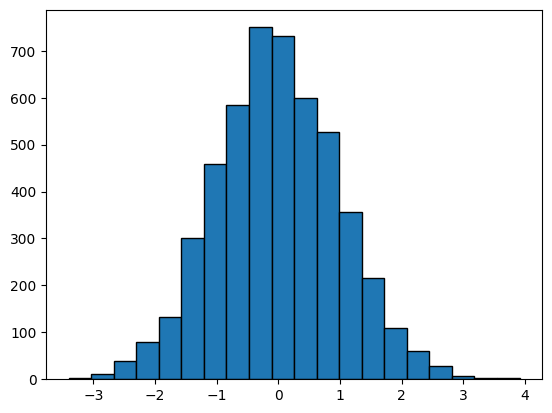

In [ ]:
plt.hist (x, edgecolor='black', bins=20)

**Вывод**: данные из х похожи на гаусиан - это говорит о том, что они имеют нормальный характер распределнения (это соответствует истине. т.к. мы построили исходно именно нормальные данные)

 - Q-Q диаграмма

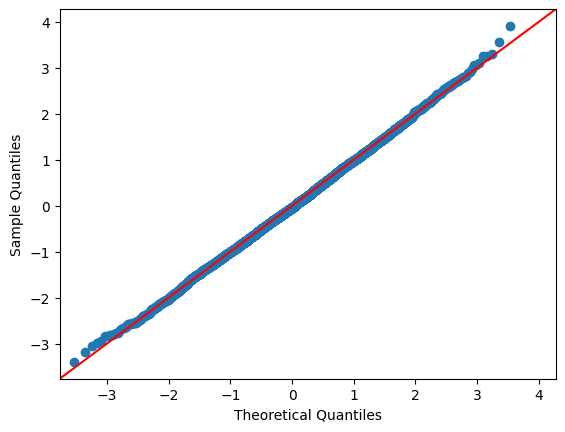

In [ ]:
#create Q-Q plot with 45-degree line added to plot
fig = sm. qqplot (x, line='45')

plt.show()

**Вывод:** данные из х разместились вдоль основной (теоретической) оси - это говорит о том, что они имеют нормальный характер распределнения (это соответствует истине. т.к. мы построили исходно именно нормальные данные)

- выполнить тест Шапиро-Уилка (нулевая гипотеза : распределение нормально) или другие тесты нормальности

In [ ]:
stat, p = stats.shapiro(x)
print('shapiro result:',stat, p)

shapiro result: 0.9995572566986084 0.31651049852371216


p-значение меньше 0,05, отвергаем нулевую гипотезу теста Шапиро-Уилка.
p-значение > 0,05, не можем отвергнуть нулеую гипотезутеста Шапиро-Уилка.

Поскольку p-значение больше 0,05, не отвергаем нулевую гипотезу теста Шапиро-Уилка.


Колмогоров:

In [ ]:
stat, p = stats.kstest(x, 'norm')
print('Колмогоров result:',stat, p)

Колмогоров result: 0.019149206457095835 0.050454008972969144


Пирсон:

In [ ]:
stat, p = stats.normaltest(x) # Критерий согласия Пирсона
print(' Пирсон-тест: Statistics=%.3f, p-value=%.3f' % (stat, p))

 Пирсон-тест: Statistics=3.699, p-value=0.157


In [ ]:
alpha = 0.05 # уровень значимочти
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Принять гипотезу о нормальности


- **построим второй пример**: не нормальный (экспоненциальный ) закон распределения для x_e

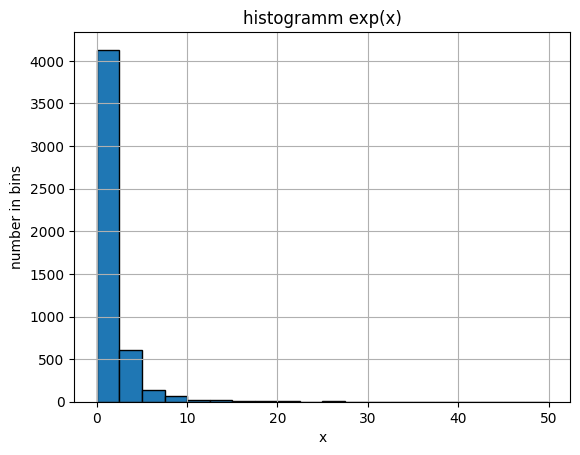

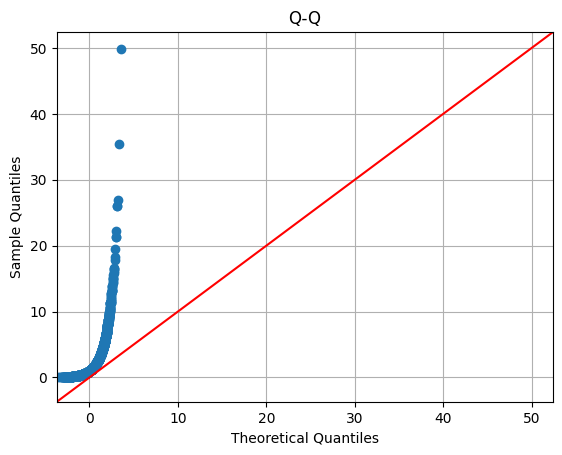

shapiro result: 0.5567348599433899 0.0
Колмогоров result: 0.019149206457095835 0.050454008972969144


In [ ]:
x_e = np.exp(x)

plt.hist (x_e, edgecolor='black', bins=20)
plt.xlabel('x')
plt.ylabel('number in bins')
plt.title('histogramm exp(x)')
plt.grid()
plt.show()

sm. qqplot (x_e, line='45')
plt.grid()
plt.title('Q-Q')
plt.show()



stat, p = stats.shapiro(x_e)
print('shapiro result:',stat, p)

stat, p = stats.kstest(x, 'norm')
print('Колмогоров result:',stat, p)


**Вывод:** данные из х_е не разместились вдоль основной (теоретической) оси - это говорит о том, что они имеют не нормальный характер распределнения (это соответствует истине. т.к. мы построили исходно именно не нормальные данные)

**Как обращаться с не нормальными данными**
Если данный набор данных не имеет нормального распределения, мы часто можем выполнить одно из следующих преобразований, чтобы сделать его более нормально распределенным:

1. Преобразование журнала: преобразование значений из x в log(x) .

2. Преобразование квадратного корня: преобразование значений из x в √ x .

3. Преобразование кубического корня: преобразование значений от x до x 1/3 .

#Scikit-Learn

Scikit-Learn — это Python-библиотека, разработанная David Cournapeau в 2007 году и содкржит большое количество алгоритмов для задач, связанных с классификацией и машинным обучением в целом.

Scikit-Learn базируется на библиотеке SciPy, которую нужно установить перед началом работы

Установка:

In [ ]:
# !pip install scikit-learn # в колаборатории этого можно не делать, в своей локальной среде необходимо обеспечить установку пакета и всех его зависимостей


### Наборы данных

Для хранения наборов данных scikit learn  :
  - использует массивы в формате numpy.array ( из библиотеки NymPy)
  - использует разреженные матрицы в формате scipy.sparse (из библиотеки SciPy)
  - поддерживает формат хранения DataFrame из библиотеки Pandas
  - имеет функции, позволяющие считывать данные из внешних файлов в форматах txt, csv, json и так далее.
  - использует наборы данных, которые поставляются вместе с библиотекой. Это открытые общеизвестные данные:
      - **данные о стоимости жилья в Бостоне**: исходя из количества комнат и уровня преступности в городе, модель может вычислять цены на жилье;
      - **данные о результатах диагностики рака молочных желез** из города Висконсина: используются для выявления злокачественного или доброкачественного новообразования;
      - **датасет химических свойств вин**: исходя из этих свойств модель может определить тип вина.




### **Задание 1.** Знакомимся с методами получения данных внутри пакета scikit learn.

  1.1. Загрузить набор **стоимость жилья в Бостоне**.


In [5]:
from sklearn.datasets import fetch_california_housing
import sklearn.datasets as datasets

V = fetch_california_housing(return_X_y=True)

In [6]:
x = V[0]
y = V[1]
x.shape, y.shape  # x - описание объектов, у - стоимость объектов

((20640, 8), (20640,))

1.2. Вывести таблицу с описанием данных и определить характер целевого свойства и оценить полноту данных

1.3. Постоить гистограмму стоимости

1.4. построить гистограммы для признаков

1.5. Сделать визуальную оценку характера распределения

1.6. Оценить характер распределения опираясь на тесты нормальности

1.7. Определить основной набор статистик для х и у

1.8. Оцените факт наличия/отсутствия выбросов и охарактеризуйте качество данных (резюме предществующих пунктов )


In [7]:
#1.2
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
 6   6       20640 non-null  float64
 7   7       20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


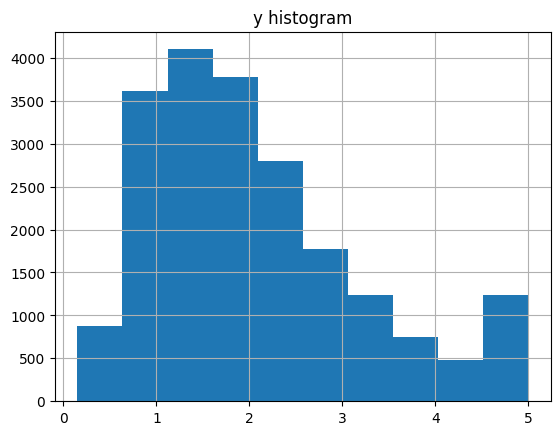

In [9]:
#1.3
plt.hist(y)
plt.grid()
plt.title('y histogram')
plt.show()

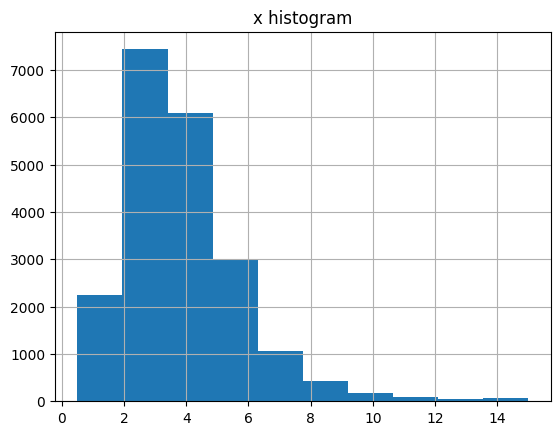

In [11]:
#1.4
plt.hist(x[:,0])
plt.grid()
plt.title('x histogram')
plt.show()

1.5.  ...

Оценка характера распределения: ...

1.6 оценка через статистические тесты:

In [12]:
# 1.6
stat, p = stats.shapiro(y)
p

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [13]:
# 1.7.

pd.DataFrame(y).describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [14]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


1.8. Оценка набора данных:

-
-
-


Можно формировать синтетические наборы данных из datasets.make_classification (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification). Каждый класс состоит из ряда гауссовых кластеров, каждый из которых расположен вокруг вершин гиперкуба в подпространстве размерности n_informative. Для каждого кластера информативные признаки рисуются независимо от N(0, 1), а затем случайным образом линейно комбинируются внутри каждого кластера для добавления ковариации. Затем кластеры размещаются в вершинах гиперкуба. Основные параметры для настройки генереируемых наборов:
  - n_samples=100, по умолчанию = 100
Количество образцов.
  - n_features=20, Общее количество признаков
  - n_informative=2, Количество информативных признаков.
  - n_redundant=2, Количество избыточных признаков (генерируются как случайные линейные комбинации информативных признаков)
  - n_classes=2,Количество классов (или меток) задачи классификации
  - n_clusters_per_class=2,Количество кластеров на класс
  - shuffle=True, Перемешаем объекты
  - random_state=None - зерно генератора случайных чисел


  Построим примеры синтетических наборов:



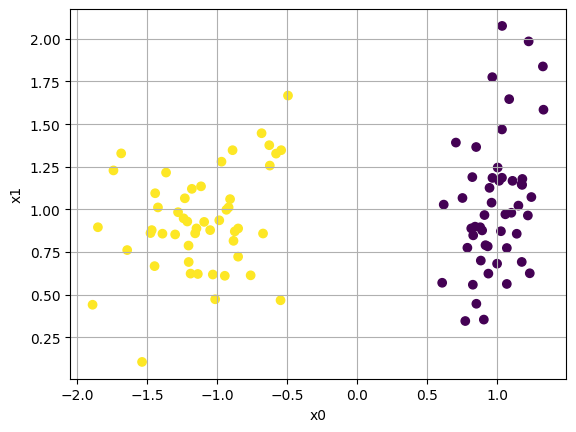

In [15]:
# 100 примеров, 2 информативных признака, нет избыточных признаков, 2 класса и один кластер на класс

X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1],c = y)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

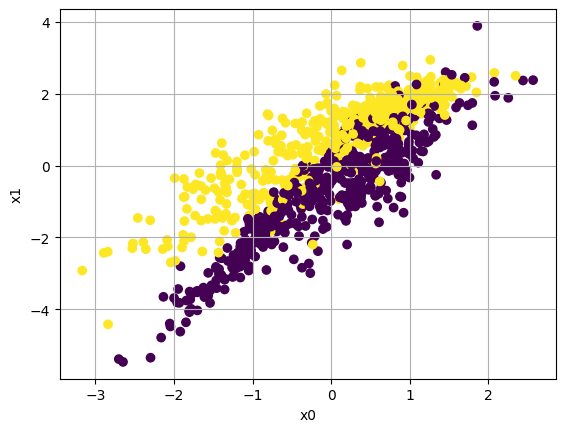

In [17]:
# 1000 примеров, 10 информативных признака, 2 избыточных признакf, 2 класса и 2 кластер на класс

X, y = datasets.make_classification(n_samples = 1000, n_features=5, n_redundant=2, n_informative=2,random_state=1, n_clusters_per_class=2)

plt.scatter(X[:,0],X[:,1],c = y)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

Генерация гаусовой смеси через sklearn.datasets.make_blobs позволяет строить похожие на реальные еэкземпляры датасетов. Не является в явной форме классификационным набором данных, но можно успешно использовать для генерации синтетических данных классификационных задач, т.к. возвращает и описание объектов и у-принадлежность источнику. Позволит построить сравнительно сложные для классификации задачи.  Для настройки использует следующие параметры:

  - n_samples=100, по умолчанию = 100
Количество образцов.
  - n_features=20, Общее количество признаков
  - centers=None,Количество гаусовых источников (центров нормальных распределений для генерации данных)
  - cluster_std = 1.,характеристика рассеивания (стандартное отклонение)
  - shuffle=True, Перемешаем объекты
  - random_state=None - зерно генератора случайных чисел

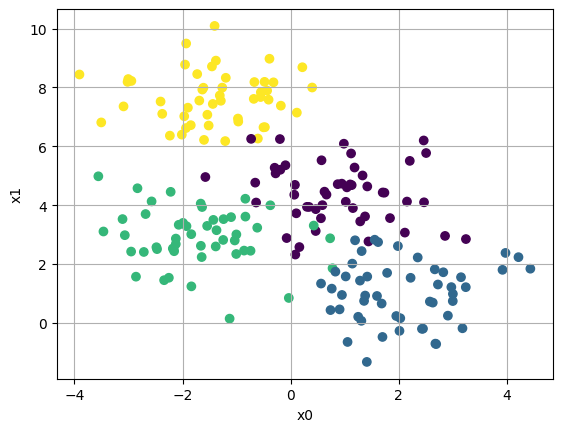

In [19]:
X, y = datasets.make_blobs(n_samples=200, centers=4, n_features=2, random_state=0)

plt.scatter(X[:,0],X[:,1],c = y)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

### **Задание 2.** Знакомимся с методами генерации данных внутри пакета scikit learn.

2.1 Создать синтетический набор данных для классификации на основе datasets.make_classification с числом классов 3, 2 мя информативными признаками и 3-мя избыточными, определить по 2 кластера в каждом классе и число примеров 1000

2.2. Провести анализ полученных признаков : основные статистики, гистограммы, оценка нормальности

2.3 Создать синтетический набор данных для классификации на основе datasets.make_blobs с числом источников 3, 2-мя  признаками и числом примеров 1000

2.4. Провести анализ полученных признаков : основные статистики, гистограммы, оценка нормальности

### **Задание 3.**

Самостоятельно оценить данные по варианту:


In [23]:

V1 = datasets.load_wine()
V2 = datasets.load_digits()
V3 = datasets.load_breast_cancer()
V4 = datasets.make_classification(n_samples = 10000, n_features=5, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
V5 = datasets.fetch_covtype(return_X_y=True)
V6 = datasets.make_blobs(n_samples=10000, centers=2, n_features=5, random_state=10)
V7 = datasets.make_circles(n_samples=10000, factor=0.5, noise=0.05)
V8 = datasets.make_moons(n_samples=10000, noise=0.05)


In [26]:
V1.keys(), V2.keys(), V3.keys()

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']),
 dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']),
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']))

In [27]:
V4[0][:2,:], V4[1][:2]

(array([[-1.53369129,  0.15903459,  0.0266148 , -0.76339466,  1.04238734],
        [ 0.15994651, -2.17701829, -1.19275252, -1.55325021,  0.00276112]]),
 array([0, 1]))

In [29]:
V5[0][:2,:5], V5[1][:2]

(array([[ 2.596e+03,  5.100e+01,  3.000e+00,  2.580e+02,  0.000e+00],
        [ 2.590e+03,  5.600e+01,  2.000e+00,  2.120e+02, -6.000e+00]]),
 array([5, 5], dtype=int32))

In [30]:
V6[0][:2,:5], V6[1][:2]

(array([[  6.04045034, -10.12182025,   3.18873994,   6.74561964,
           0.85746391],
        [  5.26263776,  -8.3128473 ,   2.6827971 ,   5.89951073,
           0.48186953]]),
 array([0, 0]))

In [31]:
V7[0][:2,:5], V7[1][:2]

(array([[-0.12753014, -0.53077324],
        [ 0.83850362, -0.65087053]]),
 array([1, 0]))

 3.1.Загрузить данные  по варианту

 3.2.Опредлелить размер данных, их тип, полноту, получить основные статистики, постороить гистограммы и оценить нормальность признаков и целей

 3.3.сделать визуализацию для 2-х координат с метками цветом по классам

 3.4.сделать выводы о качестве данных

# Метод ближайших соседей

Метод ближайших соседей (k Nearest Neighbors, или kNN) — тоже очень популярный метод классификации, также иногда используемый в задачах регрессии. Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотезой компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:
 - Вычислить расстояние до каждого из объектов обучающей выборки
 - Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
 - Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей

 Примечательное свойство такого подхода  – его ленивость. Это значит, что вычисления начинаются только в момент классификации тестового примера, а заранее, только при  наличии обучающих примеров, никакая модель не строится.

 Методы на основе соседей известны как не обобщающие методы машинного обучения, поскольку они просто «запоминают» все свои обучающие данные



### Метод ближайших соседей в реальных задачах


Качество классификации методом ближайших соседей зависит от нескольких параметров:
 - число соседей
 - метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100.
 - веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

Известная реализация метода ближайших соседей во фреймвоке SkiKit-Learn (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

**class** sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) ,

где при инициализации определяем следующие параметры:

  - n_neighbors=5,
  - weights='uniform',однородные веса. Все точки в каждой окрестности имеют одинаковый вес.Кроме того, возможен вариант 'distance' : взвешивание точек обратно их расстоянию. в этом случае более близкие соседи точки запроса будут иметь большее влияние, чем соседи, которые находятся дальше. Третий вариант : **собственная функция** определяемая пользователем, которая принимает массив расстояний и возвращает массив той же формы, содержащий веса
  - algorithm : "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем - расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
  - leaf_size (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей
  - metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие


При работе в любой классификационной задаче необходимо выполнить следующие действия:

  1. прочитать (или создать) данные
  2. проверить их полноту и чистоту
  3. оценить размер данных и соотношение классов во множестве примеров (сбалансированные классы или нет)
  4. разделить выборку на тренировочную ( очень часто еще и на тренировочную и валидационную) и отложенную
  5. обработать примеры из тренировочной выборки, реализовать схему их обработки функционально или в рамках ООП и применить к (если есть, валидационным данным и) отложенной выборке
  6. создать объект классификатор (или несколько классификаторов для сравнения моделей различной сложности)
  7. обучить объект классификатор (или несколько объектов классификаторов)
  8. выбрать метрику для оценки модели
  9. Оценить эффективность модели (или сравнить эффективность нескольких обученных моделей)
  10 применить модель к данным отложеной выборки и определить значения выбраной метрики
  11. Сделать вывод о качестве модели


**Пример работы в KNN:**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = load_iris()
X, y = data.data, data.target

In [ ]:
X[0, :]

array([5.1, 3.5, 1.4, 0.2])

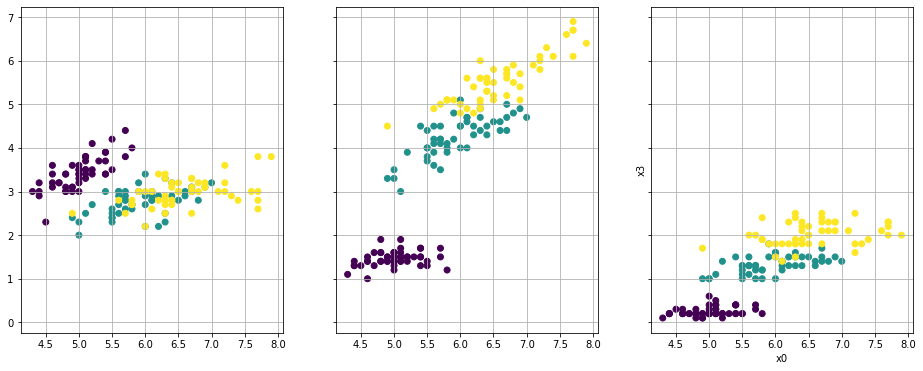

In [ ]:
f, axes = plt.subplots(1, 3, sharey=True, figsize=(16, 6))
for i in range(1,4):
    axes[i-1].scatter(X[:, 0], X[:, i], c=y)
    axes[i-1].grid()

plt.xlabel('x0')
plt.ylabel('x'+str(i))
plt.show()

Посмотрим на соотношение классов в выборке, видим, что  поровну .

In [ ]:
np.bincount(y)

array([50, 50, 50])

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели.

In [ ]:
# разбиение данных на тренировочные и отложенную выборку (тестовые),
#где X, y - описание примеров и их целевое свойство (классы), а test_size=0.3 - пропорция разбиения (доля тестов)
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

Обучим  kNN.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
%%time
knn.fit(X_train, y_train)

CPU times: user 1.21 ms, sys: 15 µs, total: 1.23 ms
Wall time: 1.23 ms


KNeighborsClassifier(n_neighbors=10)

Сделаем прогнозы для отложенной выборки. Видим, что метод ближайших соседей справился неплохо.

In [ ]:

knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.9333333333333333

**Задание 4**

ПРоверить для предществующего примера:

  4.1. число соседей : 1, 3, 5, 7, 100
  
  4.2. метрики для оценки расстояний "minkowski", "manhattan", "euclidean" (для числа соседей , которое обеспечило лучший результат по accuracy)

  4.3. использовать вариант с weights= 'distance' (для числа соседей , которое обеспечило лучший результат по accuracy)

  4.4. Сравнить результаты работы на отложенной выборке

  4.5. построить график для accuracy от числа соседей и составить таблицу результатов для 4.2 и 4.3



**Задание 5**

  5.1. Провести формирование классификатора KNN для набора по своему варианту (см. задание 3) в нескольких модификациях по числу соседей, расстояний и способов взвешивания (построить 10 вариантов)
  
  5.2. Определить вид метрики , который соответствует степени сбалансированности набора данных
  
  5.3. Сравнить варианты классификатора по метрике .

  5.4. Оценить время выполнения анализа 1000 входных векторов при условии установки параметра algorithm в каждое из слудующих значений: "brute", "ball_tree", "KD_tree"

Резюме :

- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
- Идея ближайшего соседа расширяется и на другие задачи, например, в рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди *ближайших соседей* человека, которому хотим сделать рекомендацию;
- На практике для больших выборок часто пользуются *приближенными* методами поиска ближайших соседей.

Вопросы для контроля:

  1. Можно ли обуществить формирование классификатора, который не ошибается
  2. Зачем нужно отложенная выборка
  3. как повлияет на результат теста увеличение числа соседей
  4. как повлияет на результат теста изменение способа оценки расстояний в алгоритме ближайщего соседа
  5. перечислите достоинства алгоритма к ближайщий сосед
  6. каковы недостатки метода к ближайщий сосед
  7. как сократить поиск в пространстве примеров соседей